# Exploring Performance Patterns and Insights in NBA Player Data: A Comprehensive Analysis

### importing libraries

In [39]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#showing all columns
pd.set_option('display.max_columns', 500)

### Data information:

BY PLAYER:

- Rank: The rank of the player (ordered by points scored each season).
- Year: An object-type column for Season Year (eg. "2018-19").
- Season Start Year: A numeric (integer) year column (eg. 2018).
- Season Type: Regular Season or Playoffs.
- Player ID: An ID generated for each player.
- Player: The name of the player.
- Team ID: ID generated for each team.
- Team: The team of the player at the respective season.
- Games Played: Games played in the respective season.
- Minutes Played: Minutes played in the respective season.
- FG Made: Field Goals Made.
- FG Attempts: Field Goals Attempted.
- FG %: Field Goal Percentage.
- 3-Pt FG Made: 3 Point Field Goals Made.
- 3-Pt FG Attempts: 3 Point Field Goals Attempted.
- 3-Pt FG %: 3 Point Field Goal Percentage.
- FT Made: Free Throws Made.
- FT Attempts: Free Throws Attempted.
- FT %: Free Throw Percentage.
- Offensive Rebounds: …
- Defensive Rebounds: …
- Rebounds: …
- Assists: …
- Steals: …
- Blocks: …
- Turnovers: …
- Personal Fouls: …
- Points Scored: …
- Efficency: (Points Scored + Rebounds + Assists + Steals + Blocks - Missed FG - Missed FT - Turnovers) / Games Played
- AST/TOV: Assist-to-Turnover ratio
- STL/TOV: Steal-to-Turnover ratio

In [25]:
nba = pd.read_excel('NBA_Stats_71_Years.xlsx')
nba

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,3-Pt FG Attempts,3-Pt FG %,FT Made,FT Attempts,FT %,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,548,1222,0.448,NaN,NaN,NaN,578,707,0.818,NaN,NaN,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,545,1414,0.385,NaN,NaN,NaN,433,555,0.780,NaN,NaN,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,512,1388,0.369,NaN,NaN,NaN,409,506,0.808,NaN,NaN,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,384,888,0.432,NaN,NaN,NaN,496,621,0.799,NaN,NaN,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,379,990,0.383,NaN,NaN,NaN,294,379,0.776,NaN,NaN,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,194,2022-23,2022,Playoffs,203496,Robert Covington,1610612746,LAC,2,12,0,3,0.000,0.0,2.0,0.0,0,0,0.000,0.0,2.0,2,2,0.0,1.0,0.0,2,0,2,0.0,0.0
33325,194,2022-23,2022,Playoffs,203648,Thanasis Antetokounmpo,1610612749,MIL,2,5,0,0,0.000,0.0,0.0,0.0,0,0,0.000,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0
33326,194,2022-23,2022,Playoffs,2617,Udonis Haslem,1610612748,MIA,1,2,0,2,0.000,0.0,1.0,0.0,0,0,0.000,0.0,1.0,1,0,0.0,0.0,0.0,0,0,-1,0.0,0.0
33327,194,2022-23,2022,Playoffs,1628427,Vlatko Cancar,1610612743,DEN,4,10,0,5,0.000,0.0,4.0,0.0,0,0,0.000,0.0,3.0,3,1,0.0,0.0,0.0,0,0,-1,0.0,0.0


### check the data infoormation

In [26]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                33329 non-null  int64  
 1   Year                33329 non-null  object 
 2   Season Start Year   33329 non-null  int64  
 3   Season Type         33329 non-null  object 
 4   Player ID           33329 non-null  int64  
 5   Player              33329 non-null  object 
 6   Team ID             33329 non-null  int64  
 7   Team                33329 non-null  object 
 8   Games Played        33329 non-null  int64  
 9   Minutes Played      33329 non-null  int64  
 10  FG Made             33329 non-null  int64  
 11  FG Attempts         33329 non-null  int64  
 12  FG %                33329 non-null  float64
 13  3-Pt FG Made        27033 non-null  float64
 14  3-Pt FG Attempts    27033 non-null  float64
 15  3-Pt FG %           27033 non-null  float64
 16  FT M

### Descriptive Analysis


In [27]:
#shwoing the descriptive analysis for numerical columns
nba.describe()

,Rank,Season Start Year,Player ID,Team ID,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,3-Pt FG Attempts,3-Pt FG %,FT Made,FT Attempts,FT %,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
count,33329.000000,33329.000000,3.332900e+04,3.332900e+04,33329.000000,33329.000000,33329.000000,33329.000000,33329.000000,27033.000000,27033.000000,27033.000000,33329.000000,33329.000000,33329.000000,29100.000000,29100.000000,33329.000000,33329.000000,29100.000000,29100.000000,27763.000000,33329.000000,33329.000000,33329.000000,27763.000000,27763.000000
mean,161.709322,1995.718953,2.082257e+05,1.610613e+09,40.082391,960.404423,157.218158,343.915059,0.430677,21.955055,62.314209,0.212725,80.694950,107.216148,0.679771,48.599553,120.508969,178.413364,92.243692,31.600172,19.702577,57.969492,90.641303,412.938912,466.882505,1.412655,0.573464
std,126.508479,18.247005,4.495152e+05,1.400733e+02,30.295572,938.065045,182.051106,386.520808,0.122874,40.066390,106.737292,0.196431,106.516858,137.413257,0.234667,62.840890,140.814189,215.528972,128.236587,36.784919,33.219221,65.343339,84.917607,479.021978,527.376360,1.094306,0.480922
min,1.000000,1951.000000,2.000000e+00,1.610610e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,0.000000,0.000000
25%,59.000000,1983.000000,1.559000e+03,1.610613e+09,9.000000,141.000000,18.000000,43.000000,0.391000,0.000000,1.000000,0.000000,8.000000,12.000000,0.629000,5.000000,15.000000,22.000000,8.000000,4.000000,1.000000,7.000000,15.000000,48.000000,54.000000,0.690000,0.310000
50%,130.000000,1998.000000,7.686100e+04,1.610613e+09,39.000000,589.000000,79.000000,181.000000,0.440000,3.000000,10.000000,0.250000,36.000000,50.000000,0.742000,23.000000,66.000000,95.000000,39.000000,17.000000,7.000000,32.000000,60.000000,209.000000,244.000000,1.220000,0.500000
75%,240.000000,2011.000000,2.007580e+05,1.610613e+09,72.000000,1687.000000,247.000000,546.000000,0.488000,24.000000,72.000000,0.357000,114.000000,155.000000,0.816000,67.000000,182.000000,261.000000,126.000000,49.000000,23.000000,91.000000,155.000000,645.000000,747.000000,1.950000,0.730000
max,582.000000,2022.000000,1.641645e+06,1.610613e+09,85.000000,3882.000000,1597.000000,3159.000000,1.000000,402.000000,1028.000000,1.000000,840.000000,1363.000000,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,4183.000000,21.000000,8.000000


In [28]:
#descriptive for categorical data
nba.describe(include='O')

,Year,Season Type,Player,Team
count,33329,33329,33329,33329
unique,72,2,4387,61
top,2021-22,Regular Season,Eddie Johnson,BOS
freq,822,22832,42,1668


In [29]:
# Count the occurrences of duplicated rows
duplicates_count = nba.duplicated().sum()

print("Number of Duplicated Rows:", duplicates_count)

Number of Duplicated Rows: 0


### primary insights

- no duplicates
- columns have nan values ['3-Pt FG Made','3-Pt FG Attempts', '3-Pt FG % ','Offensive Rebounds', 'Defensive Rebounds','Blocks','Turnovers','AST/TOV','STL/TOV' ]

### Questions to answer!


- How have the top 10 highest-scoring players in the NBA evolved over the years in terms of their points scored? Utilizing a colorful bar plot with Seaborn, this visualization showcases the yearly performance of these players, providing insights into their contributions and highlighting any changes in their dominance across different seasons.

- How does player performance in key attributes like 'Points Scored', 'Assists', and 'Rebounds' differ between the regular season and the playoffs in the NBA? What insights can be gleaned from the observed variations in these performance metrics?


- How have the relationships between average player efficiency and average points scored in the NBA evolved over time? Are there specific periods of alignment or deviation that shed light on the changing dynamics of player performance?

### EDA

In [30]:
#check random sample to get familiar with the data (each run will give random sample)
nba.sample(1).T

,12883
Rank,173
Year,1992-93
Season Start Year,1992
Season Type,Regular Season
Player ID,672
Player,Matt Bullard
Team ID,1610612745
Team,HOU
Games Played,79
Minutes Played,1356


In [31]:
#check values of each categorical column
for i in nba.select_dtypes(include='O'):
    print(f"Column: {i}\n")
    print(nba[i].value_counts())
    print("*********************\n")

Column: Year

2021-22    822
2020-21    779
2022-23    755
2017-18    750
2019-20    746
          ... 
1965-66    157
1956-57    156
1960-61    152
1958-59    152
1955-56    152
Name: Year, Length: 72, dtype: int64
*********************

Column: Season Type

Regular Season    22832
Playoffs          10497
Name: Season Type, dtype: int64
*********************

Column: Player

Eddie Johnson          42
Mike Dunleavy          38
Kareem Abdul-Jabbar    38
John Stockton          38
Karl Malone            38
                       ..
Ronnie MacGilvray       1
Bob Knight              1
Sylvester Gray          1
Ricky Berry             1
Michael Foster Jr.      1
Name: Player, Length: 4387, dtype: int64
*********************

Column: Team

BOS    1668
LAL    1473
NYK    1438
DET    1299
ATL    1225
       ... 
NOK      32
CAP      24
CHZ      16
CHP      13
NYN      12
Name: Team, Length: 61, dtype: int64
*********************



In [32]:
#check values of each numerical column
for i in nba.select_dtypes(exclude='O'):
    print(f"Column: {i}\n")
    print(nba[i].value_counts())
    print("*********************\n")

Column: Rank

34     160
48     155
46     154
16     153
14     151
      ... 
527      2
513      2
539      1
537      1
538      1
Name: Rank, Length: 541, dtype: int64
*********************

Column: Season Start Year

2021    822
2020    779
2022    755
2017    750
2019    746
       ... 
1965    157
1956    156
1960    152
1958    152
1955    152
Name: Season Start Year, Length: 72, dtype: int64
*********************

Column: Player ID

304        38
76003      38
252        38
1495       37
305        37
           ..
204033      1
203968      1
1007        1
76022       1
1630701     1
Name: Player ID, Length: 4423, dtype: int64
*********************

Column: Team ID

1610612738    1668
1610612747    1653
1610612737    1572
1610612755    1563
1610612752    1438
1610612765    1430
1610612744    1398
1610612758    1256
1610612764    1237
1610612741    1215
1610612749    1214
1610612745    1207
1610612757    1195
1610612760    1182
1610612759    1164
1610612756    1143
1610612762 

In [37]:
#check the columns tha have nan values
nan_cols = ['3-Pt FG Made','3-Pt FG Attempts', '3-Pt FG %',
            'Offensive Rebounds', 'Defensive Rebounds','Blocks',
            'Turnovers','AST/TOV','STL/TOV' ]

nba[nan_cols][nba[nan_cols].isna()]

,3-Pt FG Made,3-Pt FG Attempts,3-Pt FG %,Offensive Rebounds,Defensive Rebounds,Blocks,Turnovers,AST/TOV,STL/TOV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
33324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### - 2 Approaches for Handling null values

- imputing the data using model based on the other features
- removing the null rows (if the data is big and won't affect the domain of the data 
- filling these rows with mode/median/mean values 

- i will go with filling these rows with the median, mode or mean


In [38]:
# since these cols are numerical, i am going to use median
for i in nan_cols:
    med = nba[i].median()
    nba[i].fillna(med, inplace=True)

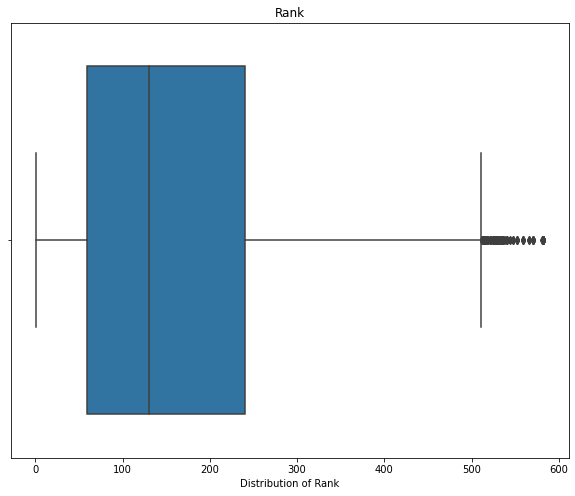

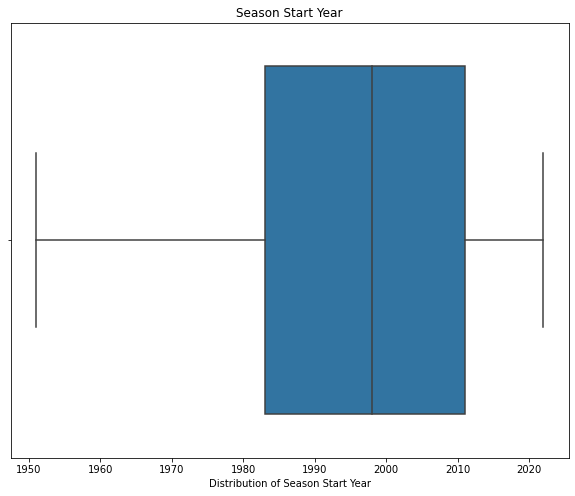

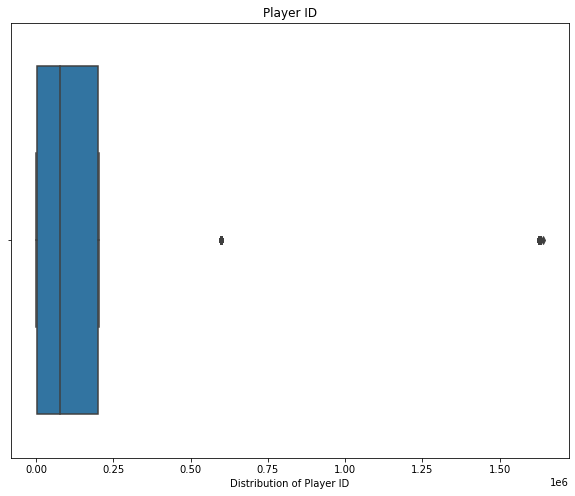

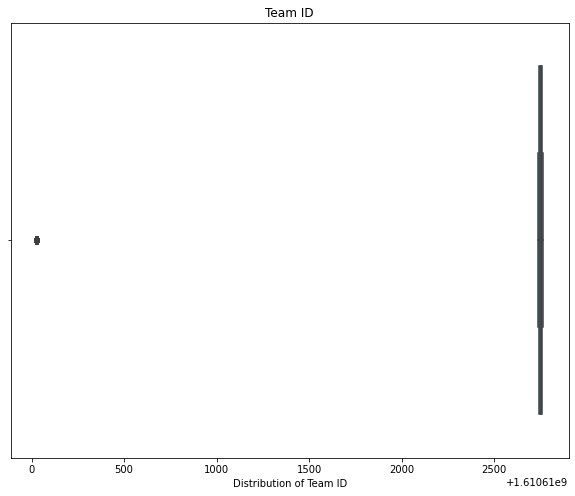

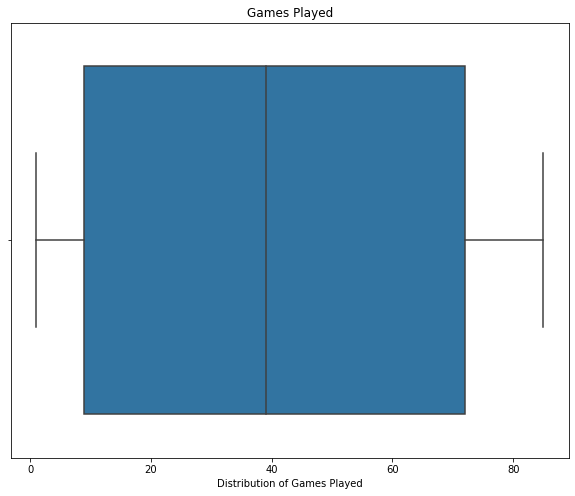

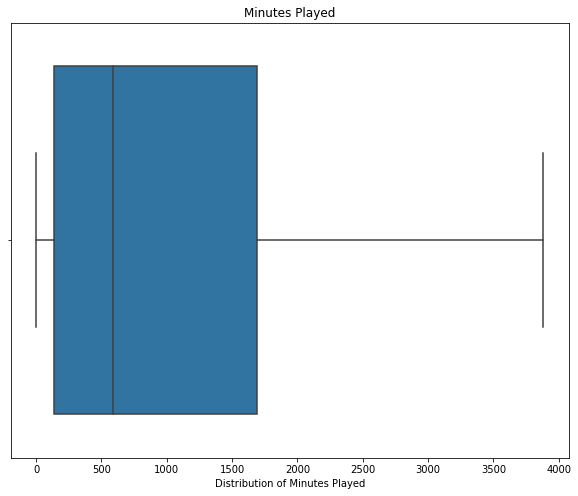

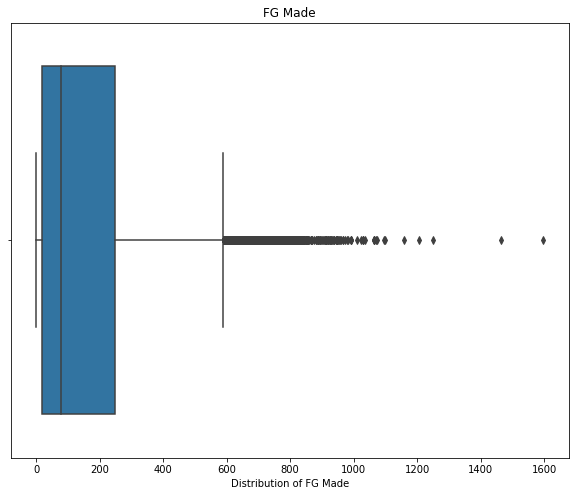

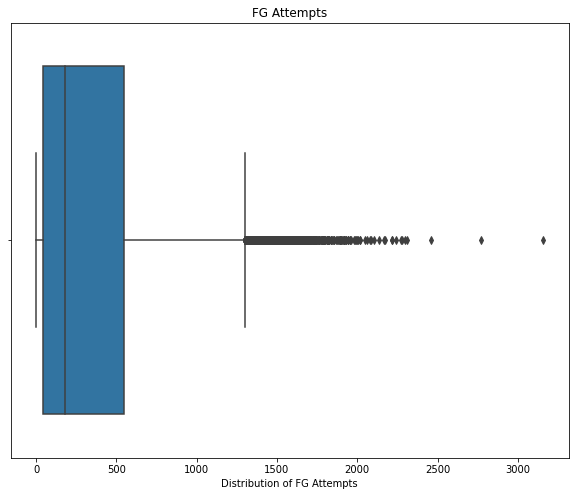

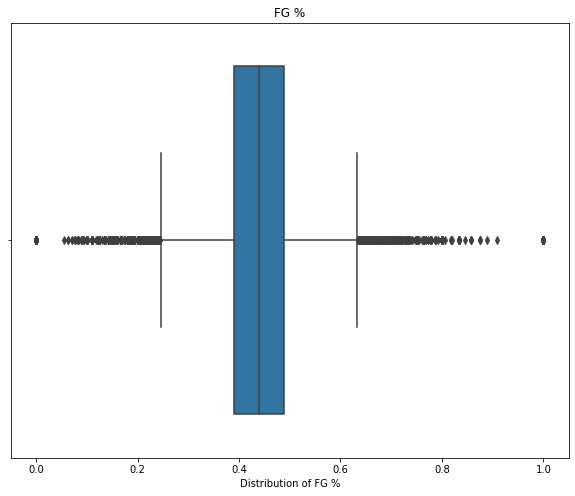

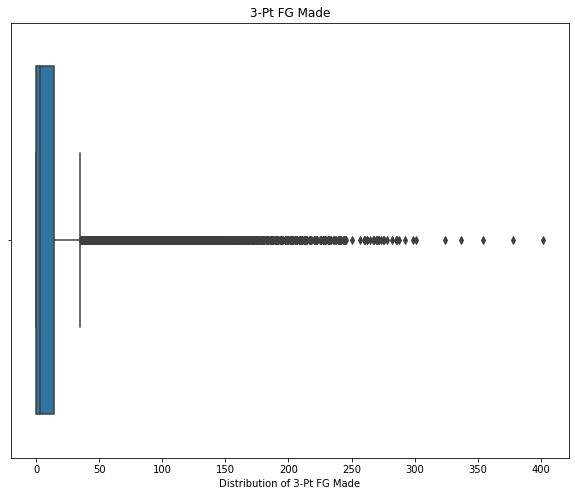

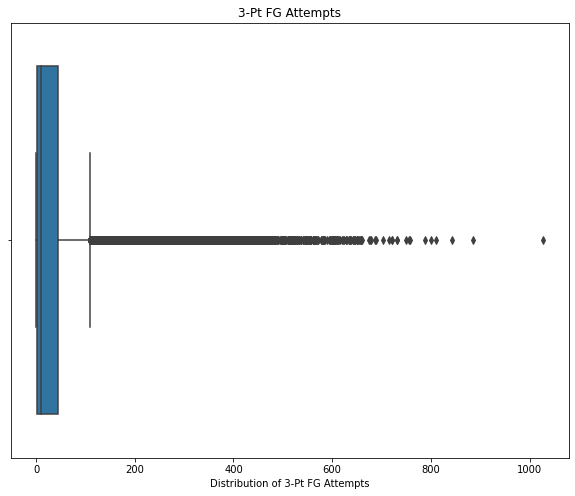

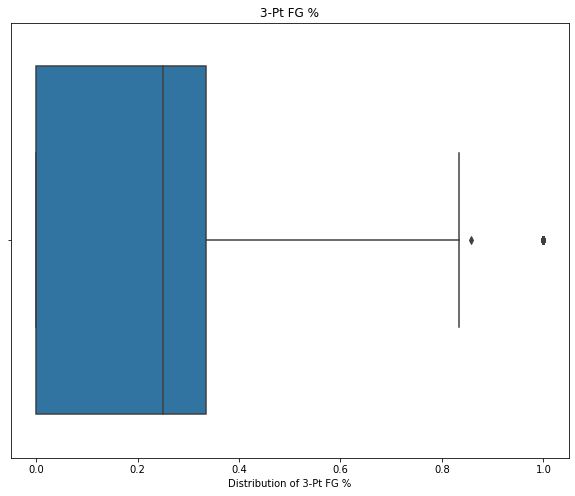

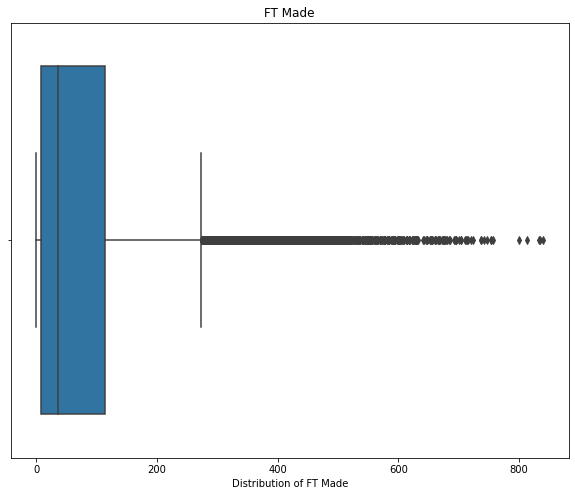

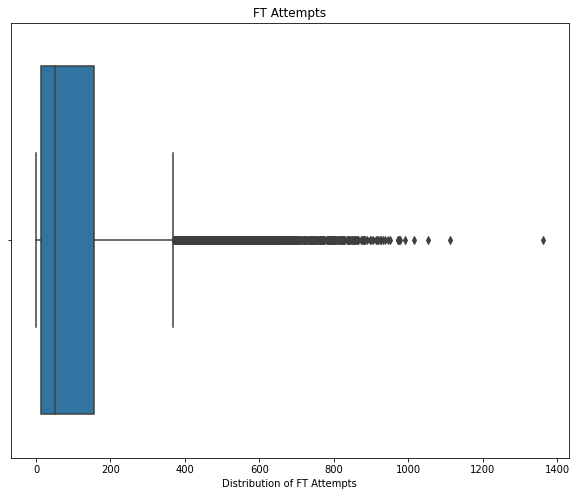

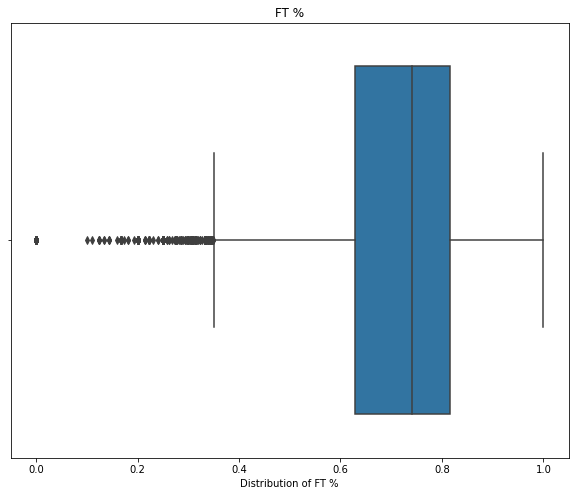

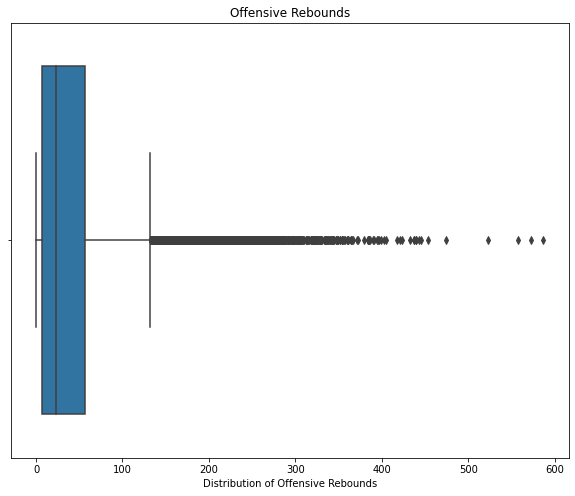

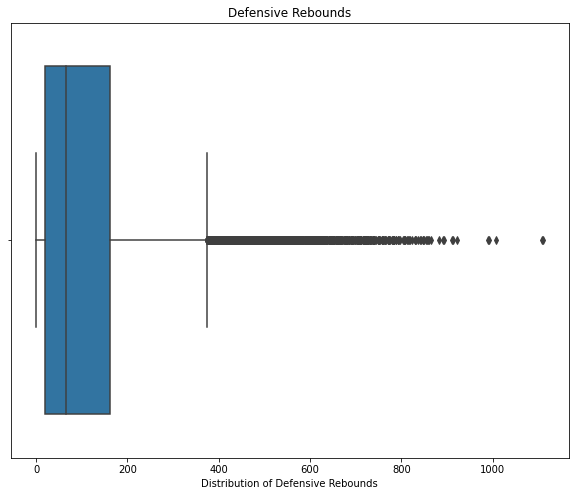

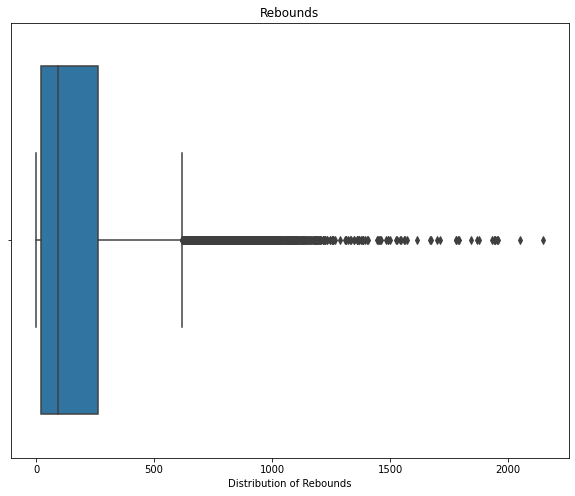

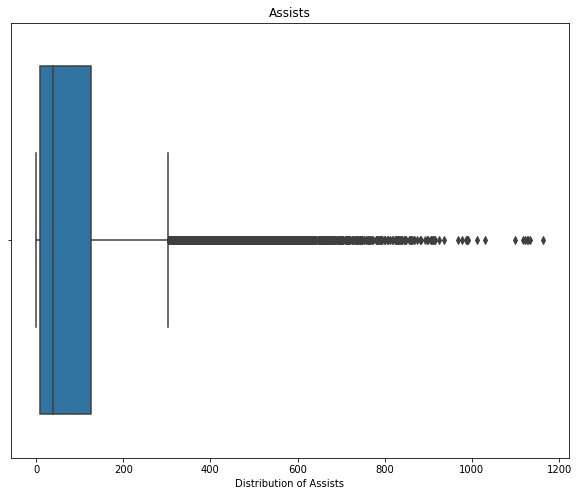

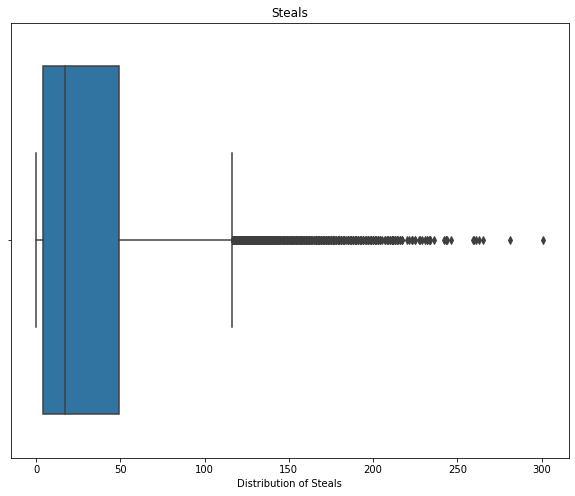

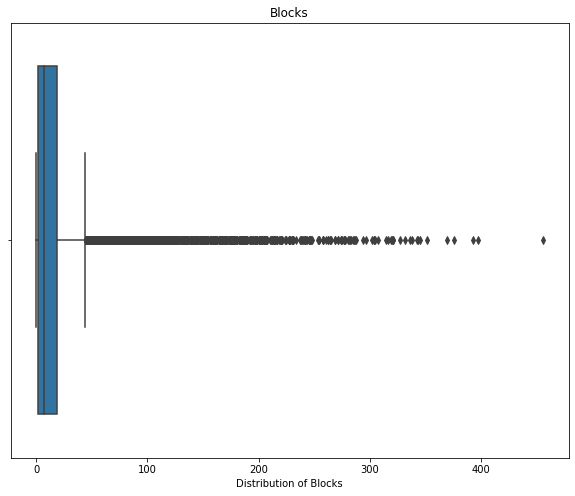

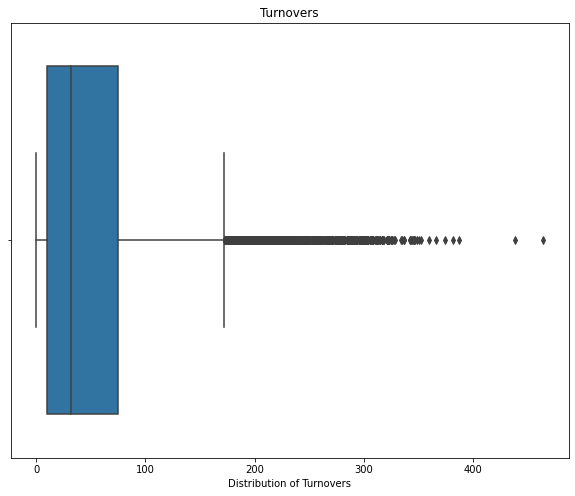

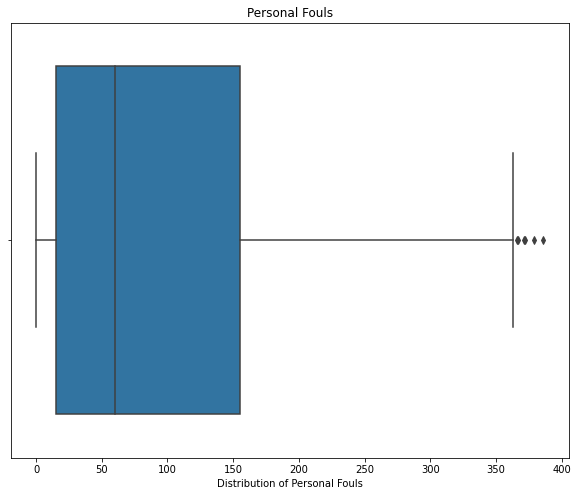

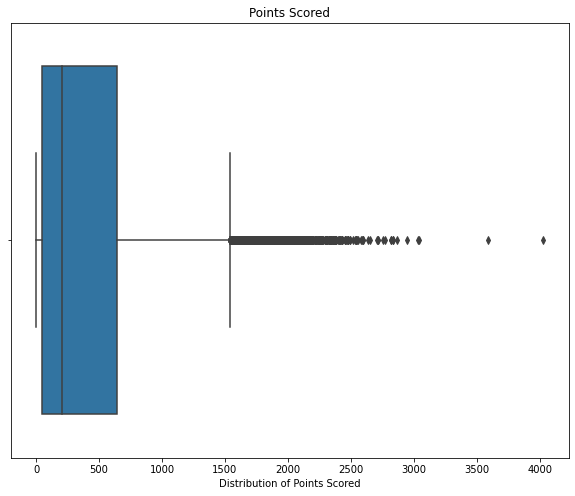

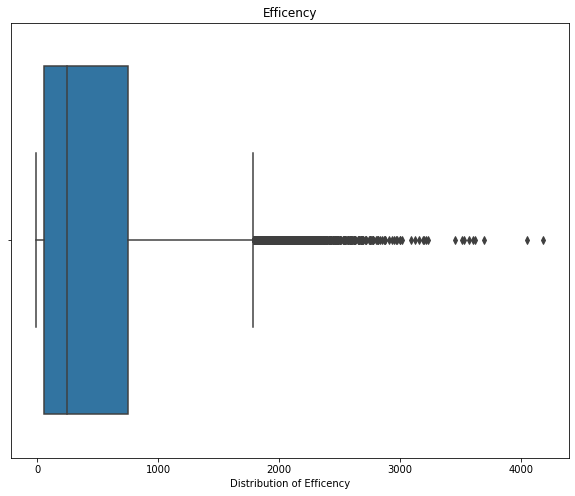

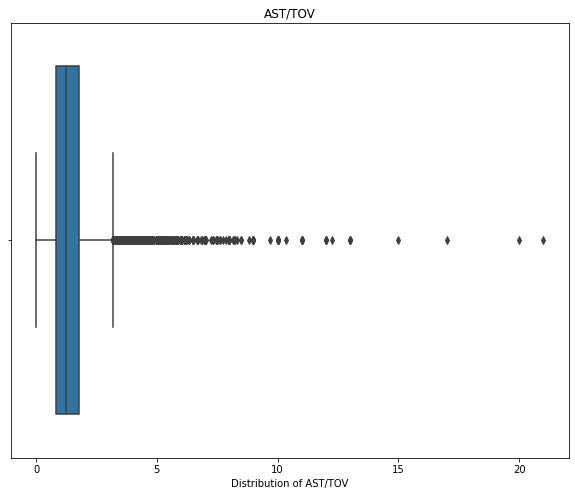

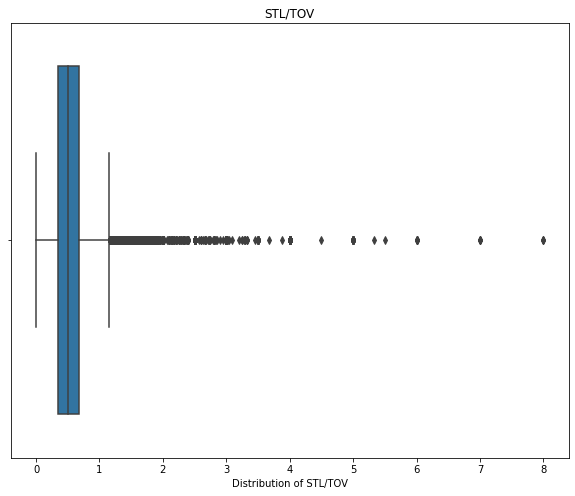

In [42]:
#check the distribtuion of the data

for i in nba.select_dtypes(exclude='O'):
    plt.figure(figsize=(10,8))
    sns.boxplot(x= nba[i])
    plt.title(i)
    plt.xlabel(f"Distribution of {i}")
    plt.show()

- the boxplot of numerical columns shows how the values distributed in each feature
- it shows some features have outliers ['3-pt FG Attempts','3-pt FG Made','FG%','FG Attempts', ...], but this outliers are normal here based on the domain knowledge of the game, it's common to see players have more attempts than averag.

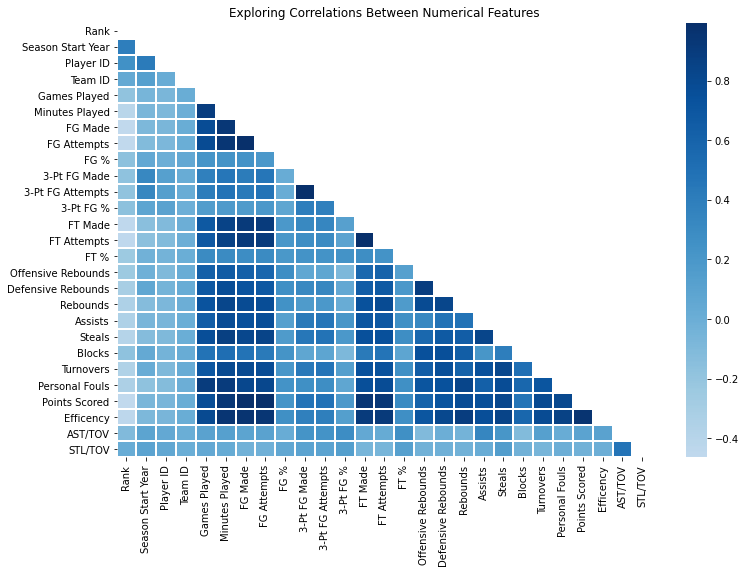

In [61]:
# Check the Correlation Between Numerical Columns
corr_df = nba.corr()

# Create a Mask for the Correlation Heatmap
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Create a Correlation Heatmap
plt.figure(figsize=(12, 8))
plt.title("Exploring Correlations Between Numerical Features")
sns.heatmap(data=corr_df, mask=mask, annot=False, cmap='Blues', center=0, linewidths=0.1)


plt.show()


### Answering the provided question

#### Q1: 
- How have the top 10 highest-scoring players in the NBA evolved over the years in terms of their points scored? Utilizing a colorful bar plot with Seaborn, this visualization showcases the yearly performance of these players, providing insights into their contributions and highlighting any changes in their dominance across different seasons.

In [105]:
highest_scorers = nba.groupby(['Year'])['Points Scored'].idxmax()
highest_scorers_players = nba.loc[highest_scorers, ['Year', 'Player', 'Points Scored']]

# Sort the DataFrame in descending order based on Points Scored
highest_scorers_players = highest_scorers_players.sort_values(by='Points Scored', ascending=False)[:10]
highest_scorers_players

,Year,Player,Points Scored
1645,1961-62,Wilt Chamberlain,4029
1822,1962-63,Wilt Chamberlain,3586
9428,1986-87,Michael Jordan,3041
1493,1960-61,Wilt Chamberlain,3033
2002,1963-64,Wilt Chamberlain,2948
9947,1987-88,Michael Jordan,2868
20719,2005-06,Kobe Bryant,2832
4524,1974-75,Bob McAdoo,2831
3686,1971-72,Kareem Abdul-Jabbar,2822
29485,2018-19,James Harden,2818


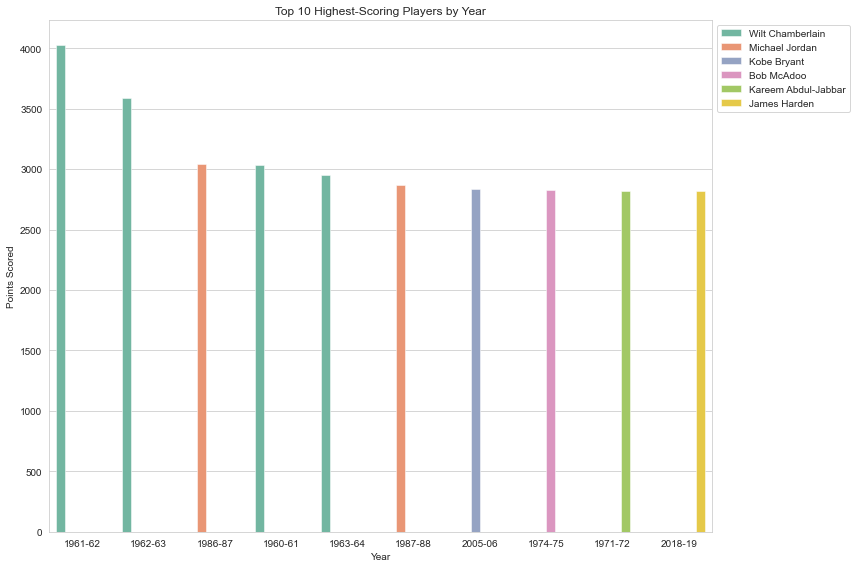

In [112]:
# Use Seaborn to create a bar plot with hue
plt.figure(figsize=(12, 8))
sns.set_palette("Set2")  # Changin a color palette
sns.set_style("whitegrid")  # Setting the style
sns.barplot(data=highest_scorers_players, x='Year', y='Points Scored', hue='Player', linewidth=.5, saturation=0.75)

plt.xlabel('Year')
plt.ylabel('Points Scored')
plt.title('Top 10 Highest-Scoring Players by Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

plt.show()


- The provided data represents the top points scored by players in various basketball seasons. It spans across different years and showcases remarkable performances by legendary players. Notably, Wilt Chamberlain's dominance is evident in multiple years, with his extraordinary 4029 points in the 1961-62 season and consistently high scores. Michael Jordan and Kobe Bryant are also featured among the top scorers, demonstrating their lasting impact on the game. This dataset underscores the impressive achievements of these players and their significant contributions to basketball history.

#### Q2:
- How does player performance in key attributes like 'Points Scored', 'Assists', and 'Rebounds' differ between the regular season and the playoffs in the NBA? What insights can be gleaned from the observed variations in these performance metrics?

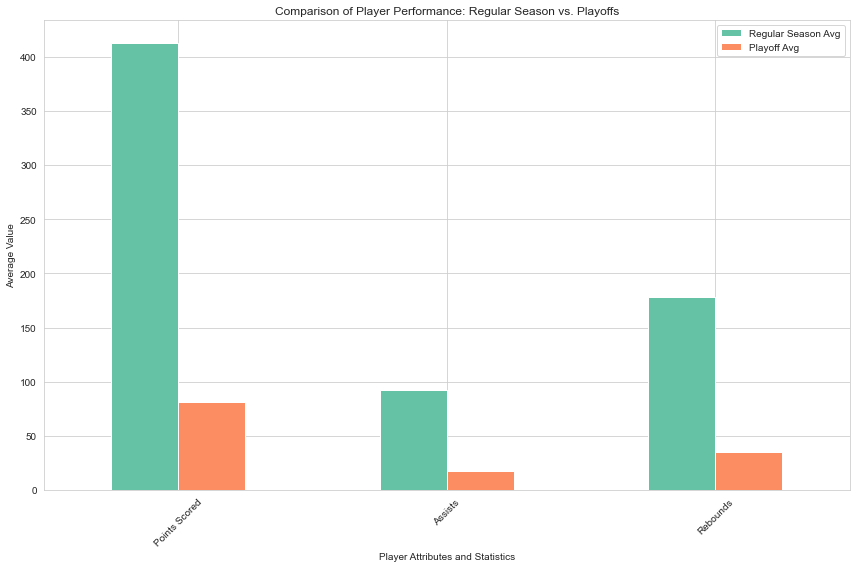

In [115]:
# Filter for playoff games
playoff_data = nba[nba['Season Type'] == 'Playoffs']

# Comparison of performance
attributes_to_compare = ['Points Scored', 'Assists', 'Rebounds']  # Add more attributes
regular_season_avg = nba[attributes_to_compare].mean()
playoff_avg = playoff_data[attributes_to_compare].mean()

comparison_df = pd.DataFrame({'Regular Season Avg': regular_season_avg, 'Playoff Avg': playoff_avg})
comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Player Performance: Regular Season vs. Playoffs')
plt.ylabel('Average Value')
plt.xlabel('Player Attributes and Statistics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The comparison between player performance attributes during the regular season and the playoffs in the NBA revealed distinct differences. Notably, in the regular season, players exhibited higher levels of performance across 'Points Scored', 'Assists', and 'Rebounds', with averages exceeding 400, almost 100, and approximately 175, respectively. However, during the playoffs, these averages dropped to around 85, below 30, and less than 25, respectively. This shift underscores how players' contributions evolve during the playoffs, likely due to intensified competition, defensive strategies, and the pressure of high-stakes matchups.

### Q3:
- How have the relationships between average player efficiency and average points scored in the NBA evolved over time? Are there specific periods of alignment or deviation that shed light on the changing dynamics of player performance?

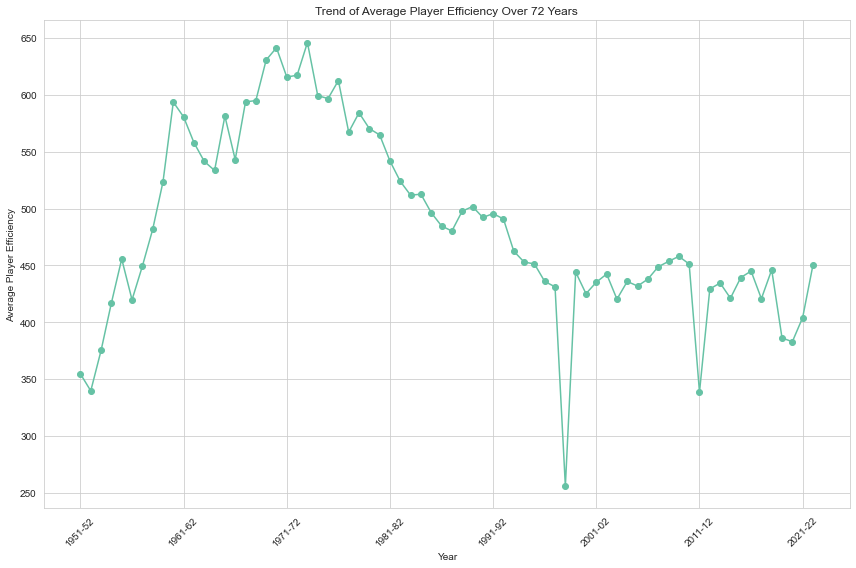

In [126]:
# Group data by Year and calculate the average player efficiency for each year
average_efficiency_by_year = nba.groupby('Year')['Efficency'].mean()

# Create a line plot to visualize the trend
plt.figure(figsize=(12, 8))
plt.plot(average_efficiency_by_year.index, average_efficiency_by_year.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Player Efficiency')
plt.title('Trend of Average Player Efficiency Over 72 Years')
plt.xticks(rotation=45)

# Set x-axis ticks to display every 10 years
plt.xticks(average_efficiency_by_year.index[::10])

plt.tight_layout()
plt.show()


In [127]:
average_efficiency_by_year

Year
1951-52    354.574468
1952-53    339.701493
1953-54    375.259036
1954-55    417.025000
1955-56    455.657895
              ...    
2018-19    446.129380
2019-20    386.226542
2020-21    382.921694
2021-22    404.149635
2022-23    450.429139
Name: Efficency, Length: 72, dtype: float64

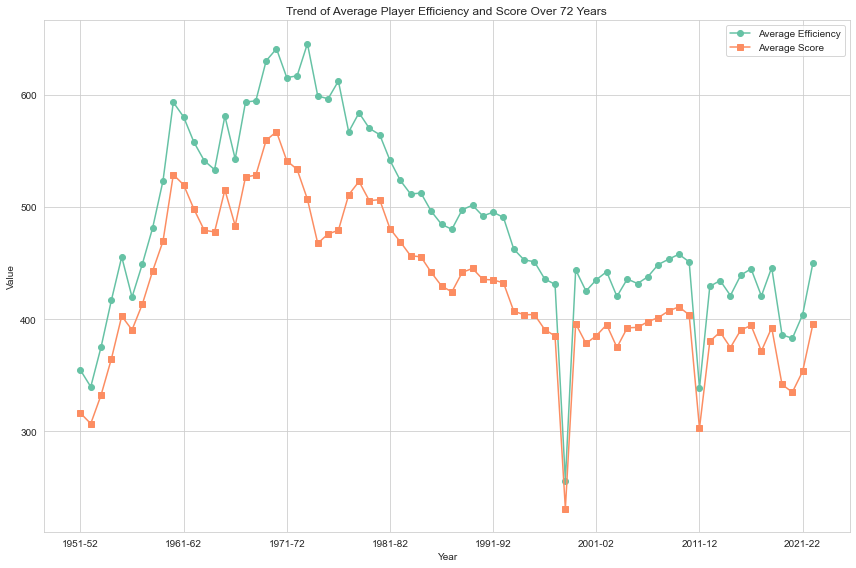

In [130]:
# Group data by Year and calculate the average player efficiency and score for each year
average_efficiency_by_year = nba.groupby('Year')['Efficency'].mean()
average_score_by_year = nba.groupby('Year')['Points Scored'].mean()

# Create a line plot to visualize the trends
plt.figure(figsize=(12, 8))
plt.plot(average_efficiency_by_year.index, average_efficiency_by_year.values, marker='o', label='Average Efficiency')
plt.plot(average_score_by_year.index, average_score_by_year.values, marker='s', label='Average Score')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trend of Average Player Efficiency and Score Over 72 Years')

# Set x-axis ticks to display every 10 years
plt.xticks(average_efficiency_by_year.index[::10])
plt.legend()
plt.tight_layout()

plt.show()


- Over the span of 72 years, the trends in average player efficiency and average points scored in the NBA exhibit intriguing fluctuations. While both metrics generally show an upward trajectory, there are notable instances of decline. Specifically, between the seasons 1971-72 and 1981-82, as well as between 1991-92 and 2001-02, both player efficiency and average points scored experienced drops after reaching peaks. These deviations from the overall trend emphasize that player performance is subject to periodic shifts, possibly influenced by changes in game strategies, rule modifications, or player demographics. Despite these fluctuations, the subsequent periods of recovery and growth underscore the league's adaptability and the resilience of players in maintaining their impact on the game over different timeframes.

### Q4: (Extra)
- Can we identify the top 10 teams that have accumulated the highest total points scored during this extensive period, shedding light on their historical offensive dominance?

In [131]:
# Group data by Team and calculate the total points scored by each team
total_points_by_team = nba.groupby('Team')['Points Scored'].sum()

# Sort the teams in descending order based on total points scored
top_10_teams = total_points_by_team.sort_values(ascending=False)[:10]

print(top_10_teams)


Team
BOS    681658
LAL    616136
NYK    612175
DET    564394
PHX    502252
CHI    495080
MIL    492406
POR    473654
ATL    472421
HOU    468418
Name: Points Scored, dtype: int64


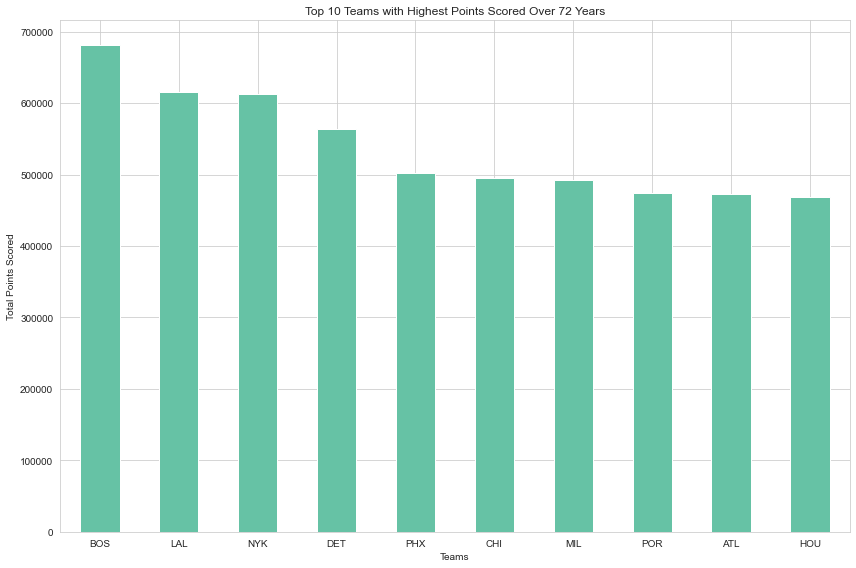

In [139]:
#setting a color palette
sns.set_palette("Set2")

# bar plot for showing the highest teams have points scored
plt.figure(figsize=(12, 8))
top_10_teams.plot(kind='bar')

plt.xlabel('Teams')
plt.ylabel('Total Points Scored')
plt.title('Top 10 Teams with Highest Points Scored Over 72 Years')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()